In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig_dir = "../manuscript/figs/"

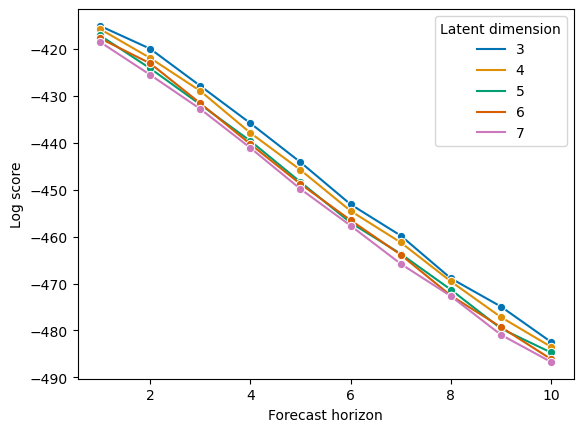

In [14]:
score = pd.read_csv("../trainedModelsLinear/results/results_linear.csv")

score = score.loc[score['latent_dim']<8]
score = score.loc[score['latent_dim']>2]
score['latent_dim'] = score['latent_dim'].astype('str')

score['log_score'] = score['log_score']*(-1)
score  = score[['latent_dim','forecast_horizon','log_score']].groupby(['latent_dim','forecast_horizon']).mean().reset_index()

sns.set_palette("colorblind")

sns.lineplot(x = 'forecast_horizon', y = 'log_score', hue = 'latent_dim', data = score, marker='o')
plt.legend(title = "Latent dimension")
plt.xlabel('Forecast horizon')
plt.ylabel('Log score')

fig_path = fig_dir + 'latent_dim_comparison_linear.pdf'

plt.savefig(fig_path, bbox_inches = 'tight', dpi=1200, format = 'pdf')

In [15]:
score_sat_naive = pd.read_csv("../trainedModelsLinear/results/results_naive_saturated.csv")
score_sat_naive['log_score'] = - score_sat_naive['log_score']
score_sat_naive = score_sat_naive[score_sat_naive['nn_layers'] == 1]
score_sat_naive = score_sat_naive[score_sat_naive['latent_dim'] == 1]
score_sat_naive = score_sat_naive[['first_year_train','last_year_train','forecast_horizon','log_score','model']]
score_sat_naive  = score_sat_naive[['forecast_horizon','log_score','model']].groupby(['model','forecast_horizon']).mean().reset_index()

score_sat = score_sat_naive[score_sat_naive['model'] == 'saturated']
score_naive = score_sat_naive[score_sat_naive['model'] == 'naive']

score_naive = score_naive.rename(columns={"log_score": "naive"})
score_naive = score_naive[['forecast_horizon','naive']]
score_sat = score_sat.rename(columns={"log_score": "saturated"})
score_sat = score_sat[['forecast_horizon','saturated']]

score = pd.merge(score, score_sat, on = ['forecast_horizon'])
score = pd.merge(score, score_naive, on = ['forecast_horizon'])
score['r2'] = (score['log_score']-score['naive'])/(score['saturated']-score['naive'])

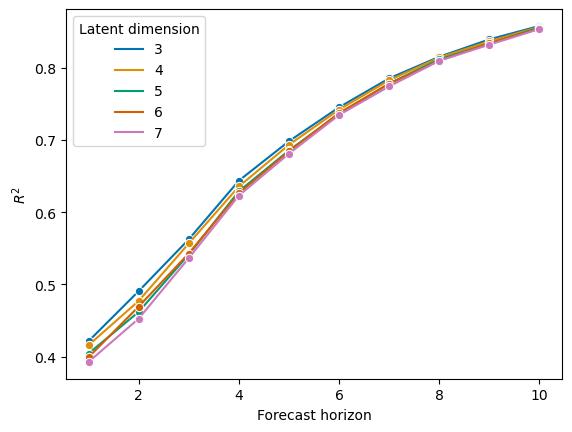

In [16]:
sns.set_palette("colorblind")

sns.lineplot(x = 'forecast_horizon', y = 'r2', hue = 'latent_dim', data = score, marker = 'o')
plt.legend(title = "Latent dimension")
plt.ylabel(r'$R^2$')
plt.xlabel('Forecast horizon')

fig_path = fig_dir + 'latent_dim_comparison_R2_linear.pdf'

plt.savefig(fig_path, bbox_inches = 'tight', dpi=1200, format = 'pdf')

In [17]:
score[['log_score','latent_dim']].groupby('latent_dim').mean().reset_index()


,latent_dim,log_score
0,3,-448.201464
1,4,-449.622533
2,5,-451.733389
3,6,-451.975209
4,7,-453.147180
